### resonator fitting, to get internal quality factor and external factor, etc
    two packages are used here, one is scresonators, https://github.com/Boulder-Cryogenic-Quantum-Testbed/scresonators, one is resonator, https://github.com/danielflanigan/resonator
    ---Zhenhai 20230227

In [12]:
import fit_resonator.resonator as scres
from resonator import shunt, see
import Labber
import numpy as np
import matplotlib.pyplot as plt

### fitting with scresonators

preprocess_method: linear
fscale: 1e+09


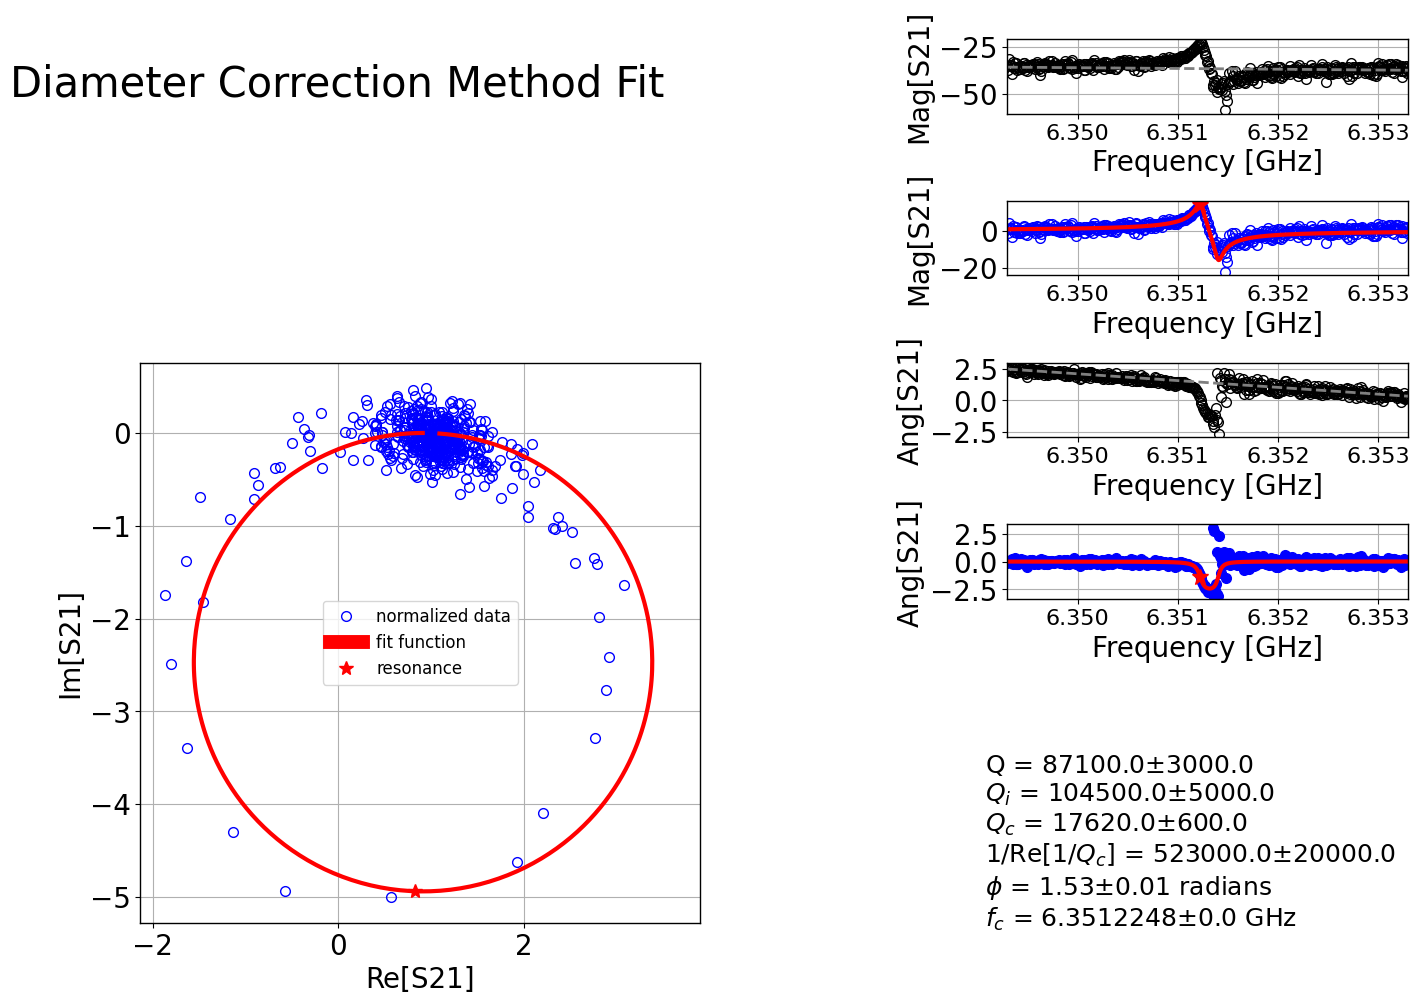

In [24]:
logfile = Labber.LogFile(r'C:\Users\T2-1\Dropbox\My PC (T2-1)\Desktop\Zhenhai\data_processing\generalCode\NW1Qualtiy.hdf5') #load the hdf5 file
rawData = logfile.getTraceXY(entry=41) # get the x data and y data for one specific entry
column0, column1, column2 = rawData[0]/1e9, 20*np.log10(np.abs(rawData[1])), np.angle(rawData[1]) # prepare the raw data for the fitting, 1st one for frequency in GHz, 2nd one is the S21 magnitute in dB, 3rd one is the phase in radians
rawData4fit = np.column_stack((column0, column1, column2)) # data shape [column0, column1, column2]

my_resonator = scres.Resonator()
my_resonator.from_columns(rawData4fit)

fit_type = 'DCM'
MC_iteration = 20
MC_rounds = 1e3
MC_fix = ['w1']
manual_init = None

my_resonator.fit_method(fit_type, MC_iteration, MC_rounds=MC_rounds, MC_fix=MC_fix, manual_init=manual_init,
                MC_step_const=0.3)
params1 = my_resonator.fit()
params1

### fit with Danielflanigan resonator

In [2]:
import lmfit
import scipy.io as sio
import resonator
from resonator import background, shunt, see
import random
import matplotlib.patches as mpatches
import numpy as np
import matplotlib.pyplot as plt
from numpy import loadtxt, savetxt
from scipy.signal import find_peaks
import Labber

No handles with labels found to put in legend.


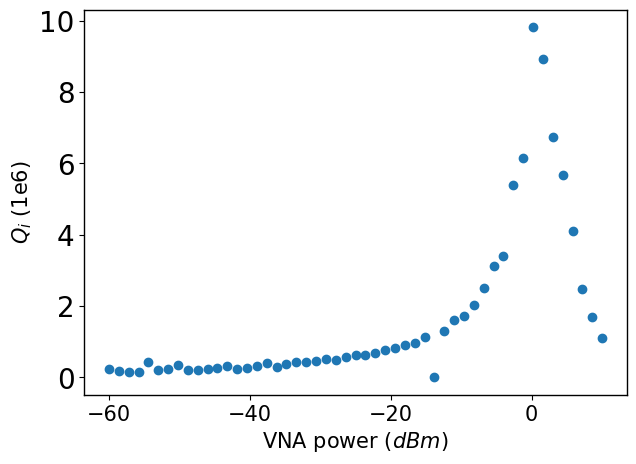

In [25]:
filename = r"C:\Users\T2-1\Dropbox\My PC (T2-1)\Desktop\Zhenhai\data_processing\generalCode\qualityFactor.hdf5"
Qi = []
Lfile = Labber.LogFile(filename)
freq, _ = Lfile.getTraceXY(entry=2) # get the frequency span used to measure S21
S21 = Lfile.getData()
for i in range(np.shape(S21)[0]): 
    r = shunt.LinearShuntFitter(frequency=freq, 
                                data=S21[i, :],
                                background_model=background.MagnitudeSlopeOffsetPhaseDelay())
    Qi.append(r.Q_i)

plt.figure(figsize=(7, 5))
power = np.linspace(10, -60, 51) # the power range used to measure resonator spectroscopy power scan
Qi = np.array(Qi)
plt.plot(power, Qi*1e-6, 'o', color = 'C0', markersize = 6, linewidth = 10)
plt.ylabel("$Q_i$ (1e6)", fontsize=15)
plt.xlabel("VNA power ($dBm$)", fontsize=15)
plt.xticks(fontsize=15)
plt.grid(None)
plt.legend(frameon=False,fontsize=15)
plt.show()